# Step 1: Sanity check and data Cleaning

In [51]:
# import the libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [52]:
# read the csv file from current directory
df = pd.read_csv("loan.csv", low_memory=False)

# view first 5 rows 
df.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,...,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
4,1075358,1311748,3000,3000,3000.0,60 months,12.69%,67.79,B,B5,...,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Columns: 111 entries, id to total_il_high_credit_limit
dtypes: float64(74), int64(13), object(24)
memory usage: 33.6+ MB


In [54]:
# analyse the null values in each column
df.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
                              ...  
tax_liens                        39
tot_hi_cred_lim               39717
total_bal_ex_mort             39717
total_bc_limit                39717
total_il_high_credit_limit    39717
Length: 111, dtype: int64

In [55]:
df.loc[df["last_credit_pull_d"].isnull(), ("last_credit_pull_d")] = df.loc[df["last_credit_pull_d"].isnull(), ("last_pymnt_d")]

In [56]:
# from the above stats we can say that there columns with all null values, therefore, let's drop those columns
df1 = df.drop(df.columns[df.isnull().sum()==len(df.index)], axis=1)
df1.isnull().sum()

id                                0
member_id                         0
loan_amnt                         0
funded_amnt                       0
funded_amnt_inv                   0
term                              0
int_rate                          0
installment                       0
grade                             0
sub_grade                         0
emp_title                      2459
emp_length                     1075
home_ownership                    0
annual_inc                        0
verification_status               0
issue_d                           0
loan_status                       0
pymnt_plan                        0
url                               0
desc                          12940
purpose                           0
title                            11
zip_code                          0
addr_state                        0
dti                               0
delinq_2yrs                       0
earliest_cr_line                  0
inq_last_6mths              

Following Columns are not going to be considered for analysis and hence will be dropped. 
Columns Removed
acc_now_delinq
acc_open_past_24mths
all_util
annual_inc_joint
application_type
avg_cur_bal
bc_open_to_buy
bc_util
chargeoff_within_12_mths
collections_12_mths_ex_med
delinq_amnt
dti_joint
il_util
initial_list_status
inq_fi
inq_last_12m
last_pymnt_amnt
last_pymnt_d
max_bal_bc
mo_sin_old_il_acct
mo_sin_old_rev_tl_op
mo_sin_rcnt_rev_tl_op
mo_sin_rcnt_tl
mort_acc
mths_since_last_delinq
mths_since_last_major_derog
mths_since_last_record
mths_since_rcnt_il
mths_since_recent_bc
mths_since_recent_bc_dlq
mths_since_recent_inq
mths_since_recent_revol_delinq
next_pymnt_d
num_accts_ever_120_pd
num_actv_bc_tl
num_actv_rev_tl
num_bc_sats
num_bc_tl
num_il_tl
num_op_rev_tl
num_rev_accts
num_rev_tl_bal_gt_0
num_sats
num_tl_120dpd_2m
num_tl_30dpd
num_tl_90g_dpd_24m
num_tl_op_past_12m
open_acc_6m
open_il_12m
open_il_24m
open_il_6m
open_rv_12m
open_rv_24m
pct_tl_nvr_dlq
percent_bc_gt_75
policy_code
pymnt_plan
tax_liens
tot_coll_amt
tot_cur_bal
tot_hi_cred_lim
total_bal_ex_mort
total_bal_il
total_bc_limit
total_cu_tl
total_il_high_credit_limit
total_rev_hi_lim
url
verification_status_joint
zip_code

In [57]:
# let's choose columns which are not useful for the analysis
df1.drop(["mths_since_last_delinq", "next_pymnt_d", "mths_since_last_record", "pymnt_plan", "url", "zip_code", "last_pymnt_d", "last_pymnt_amnt", "initial_list_status", "collections_12_mths_ex_med", "policy_code", "application_type", "acc_now_delinq", "chargeoff_within_12_mths", "delinq_amnt", "tax_liens"], inplace=True, axis=1)
df1.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp 

In [58]:
df1.loc[df["pub_rec_bankruptcies"].isnull(), ["pub_rec_bankruptcies"]] = 0
df1.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                    50
total_acc                      0
out_prncp 

In [59]:
#For column revol_util, if there is blanks, replace it with 0
df1.loc[df1["revol_util"].isnull(), ["revol_util"]] = "0%"
df1.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                  1075
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp 

In [60]:
# Analyse Annual Income and Employee length for dta cleansing and outlier treatment. 
df1[["annual_inc", "emp_length"]]

,annual_inc,emp_length
0,24000.0,10+ years
1,30000.0,< 1 year
2,12252.0,10+ years
3,49200.0,10+ years
4,80000.0,1 year
...,...,...
39712,110000.0,4 years
39713,18000.0,3 years
39714,100000.0,< 1 year
39715,200000.0,< 1 year


In [61]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 39717 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       39717 non-null  int64  
 1   member_id                39717 non-null  int64  
 2   loan_amnt                39717 non-null  int64  
 3   funded_amnt              39717 non-null  int64  
 4   funded_amnt_inv          39717 non-null  float64
 5   term                     39717 non-null  object 
 6   int_rate                 39717 non-null  object 
 7   installment              39717 non-null  float64
 8   grade                    39717 non-null  object 
 9   sub_grade                39717 non-null  object 
 10  emp_title                37258 non-null  object 
 11  emp_length               38642 non-null  object 
 12  home_ownership           39717 non-null  object 
 13  annual_inc               39717 non-null  float64
 14  verification_status   

In [62]:
# Employee cleansning, 2 points addressed are replace blanks with 0 years and remove strings/years to mark it numeric data only. 
df1.loc[df1["emp_length"].isnull(), ("emp_length")] = "0 year"
df1.isnull().sum()

id                             0
member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
int_rate                       0
installment                    0
grade                          0
sub_grade                      0
emp_title                   2459
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
issue_d                        0
loan_status                    0
desc                       12940
purpose                        0
title                         11
addr_state                     0
dti                            0
delinq_2yrs                    0
earliest_cr_line               0
inq_last_6mths                 0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
out_prncp 

In [63]:
# Function to later perform strong operation on Employee Length 
def emp_len(x):
    if x == "10+ years":
        return 10
    elif x == "< 1 year":
        return 0
    else:
        return int(x.replace("years","").replace("year", "").strip())

In [64]:
#Edit employee length for describing the years of experience. 
df1["emp_length"] = df1["emp_length"].apply(lambda x: emp_len(x))
df1["emp_length"]

0        10
1         0
2        10
3        10
4         1
         ..
39712     4
39713     3
39714     0
39715     0
39716     0
Name: emp_length, Length: 39717, dtype: int64

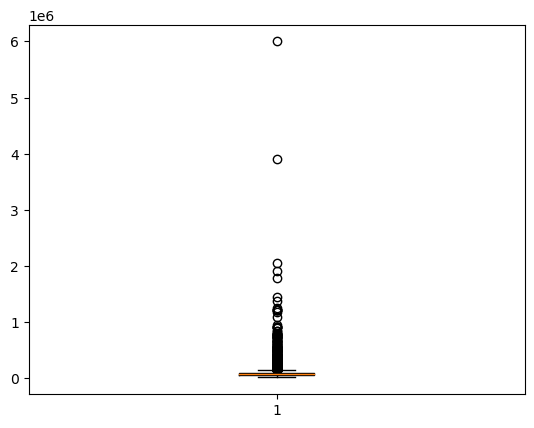

In [65]:
# Plot a boxplot of Annual income to view the outliers and then accrodingly take action. 
plt.boxplot(df1["annual_inc"])
plt.show()

In [66]:
# Get a view of the Annual Income outliers
df1 = df1[df1["annual_inc"]<1000000]

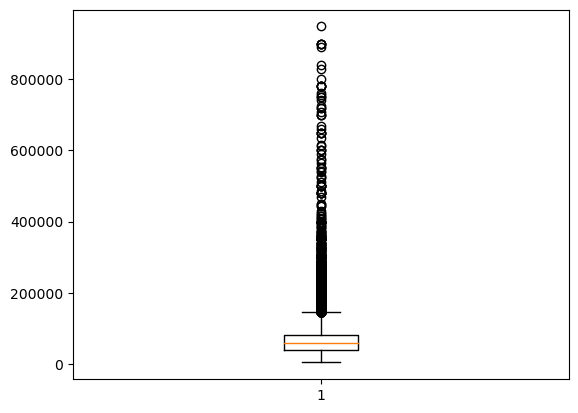

In [67]:
# View the box plot for income < 1000000
plt.boxplot(df1["annual_inc"])
plt.show()

In [68]:
# Since we have more outlier, get another view. 
df1 = df1[df1["annual_inc"]<130000]

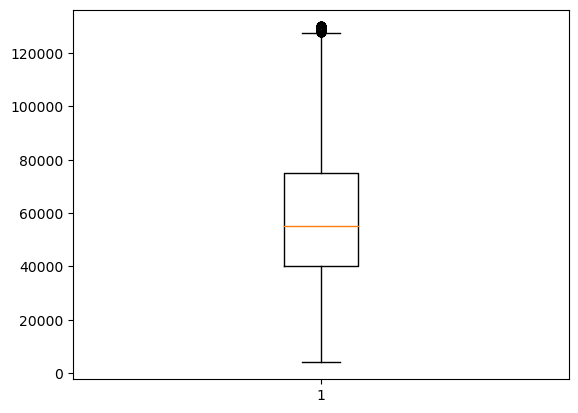

In [69]:
# This looks good
plt.boxplot(df1["annual_inc"])
plt.show()

In [70]:
# Verify median
df1["annual_inc"].describe()

count     36977.000000
mean      59540.501073
std       25975.139049
min        4000.000000
25%       40000.000000
50%       55000.000000
75%       75000.000000
max      129996.000000
Name: annual_inc, dtype: float64

In [71]:
# Outlier Treatment for Annual Income
df1.loc[df1["annual_inc"]>=130000, ("annual_inc")] = 55000

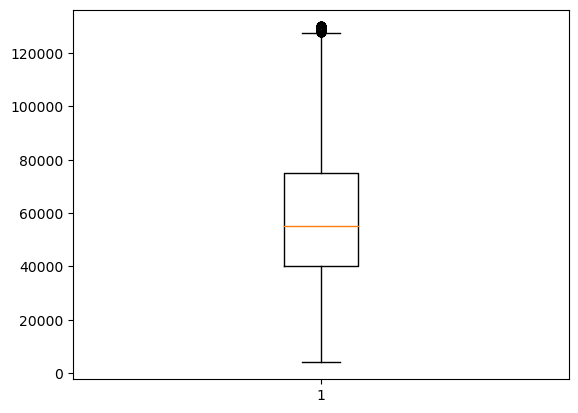

In [72]:
# Box plot for Annual Income
plt.boxplot(df1["annual_inc"])
plt.show()

In [73]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36977 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36977 non-null  int64  
 1   member_id                36977 non-null  int64  
 2   loan_amnt                36977 non-null  int64  
 3   funded_amnt              36977 non-null  int64  
 4   funded_amnt_inv          36977 non-null  float64
 5   term                     36977 non-null  object 
 6   int_rate                 36977 non-null  object 
 7   installment              36977 non-null  float64
 8   grade                    36977 non-null  object 
 9   sub_grade                36977 non-null  object 
 10  emp_title                34751 non-null  object 
 11  emp_length               36977 non-null  int64  
 12  home_ownership           36977 non-null  object 
 13  annual_inc               36977 non-null  float64
 14  verification_status   

In [74]:
# Data treatment for Int_Rate - Remove %
df1["int_rate"] = df1["int_rate"].apply(lambda x: float(x[:-1]))

In [75]:
# Data Treatment for Revol_util - Remove % and convert to INT
df1["revol_util"] = df1["revol_util"].apply(lambda x: float(x[:-1]))

In [76]:
# Terms number of months changed to contain only month and integer value
df1["term"] = df1["term"].apply(lambda x: int(x.replace("months", "").strip()))

In [77]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36977 entries, 0 to 39716
Data columns (total 41 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       36977 non-null  int64  
 1   member_id                36977 non-null  int64  
 2   loan_amnt                36977 non-null  int64  
 3   funded_amnt              36977 non-null  int64  
 4   funded_amnt_inv          36977 non-null  float64
 5   term                     36977 non-null  int64  
 6   int_rate                 36977 non-null  float64
 7   installment              36977 non-null  float64
 8   grade                    36977 non-null  object 
 9   sub_grade                36977 non-null  object 
 10  emp_title                34751 non-null  object 
 11  emp_length               36977 non-null  int64  
 12  home_ownership           36977 non-null  object 
 13  annual_inc               36977 non-null  float64
 14  verification_status   

In [78]:
df1["issue_d"]

0        Dec-11
1        Dec-11
2        Dec-11
3        Dec-11
4        Dec-11
          ...  
39711    Jul-07
39712    Jul-07
39713    Jul-07
39714    Jul-07
39716    Jun-07
Name: issue_d, Length: 36977, dtype: object

In [79]:
df1["issue_d"] = df1["issue_d"].apply(lambda x: x + "-2023")

In [80]:
issue_date = pd.to_datetime(df1["issue_d"])
df1["issue_month"] = issue_date.dt.month
df1["issue_year"] = issue_date.dt.year

df1["term_in_years"] = pd.to_datetime(df1["issue_d"]).dt.month

In [81]:
df1["last_credit_pull_d"] = df1["last_credit_pull_d"].apply(lambda x: x + "-2023")

In [82]:
last_credit_pull_date = pd.to_datetime(df1["last_credit_pull_d"])
df1["last_credit_pull_month"] = last_credit_pull_date.dt.month
df1["last_credit_pull_year"] = last_credit_pull_date.dt.year

In [83]:
earliest_cr_line_date = pd.to_datetime(df1["earliest_cr_line"], format="%b-%y")
df1["earliest_cr_line_month"] = earliest_cr_line_date.dt.month
df1["earliest_cr_line_year"] = earliest_cr_line_date.dt.year

In [84]:
# Data Clean up for Purpose column
# For values "Other" - Derive the correct value based on Desc and Title column. 
# For Example: we have Purpose = "Other", Title = "Loan consolidation" and Desc = "Repay another loan". In this case replace purpose with "Debt Consolidation"
unique_purposes = df1.purpose.unique()

In [85]:
def purpose(x):
    print(x)
    if "car" in x.lower() or "motorcycle" in x.lower() or "auto" in x.lower():
        return "car"
    elif "loan" in x.lower() and "credit card" in x.lower() or "credit card" in x.lower() or "cc" in x.lower():
        return "credit_card"
    elif "home" in x.lower() or "house" in x.lower():
        return "home_improvement"
    elif "loan" in x.lower() or "personal" in x.lower() or "consolidation" in x.lower():
        return "debt_consolidation"
    elif "care" in x.lower() or "surgery" in x.lower():
        return "medical"
    elif "vacation" in x.lower():
        return "vacation"

In [86]:
df1['derived_purpose'] = df1.title.where(df1.purpose == "other", df1.purpose)

In [91]:
#df1.derived_purpose = df1.derived_purpose.apply(lambda x: purpose(x)) # getting error for this line - will work tomorrow on this

In [92]:
#df1.to_csv('output.csv')

# Step 2: UniVariate Analysis

Univariate Graph 1


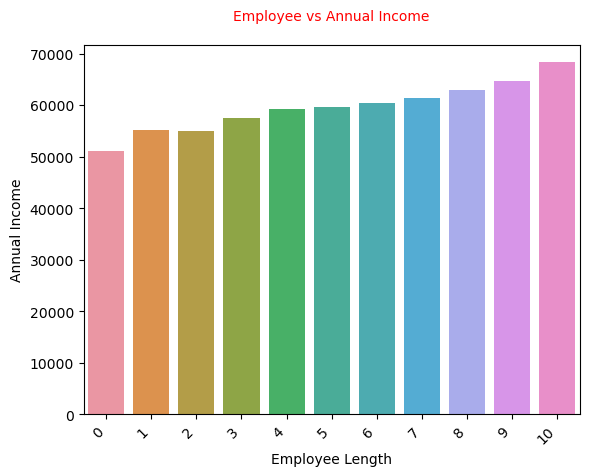

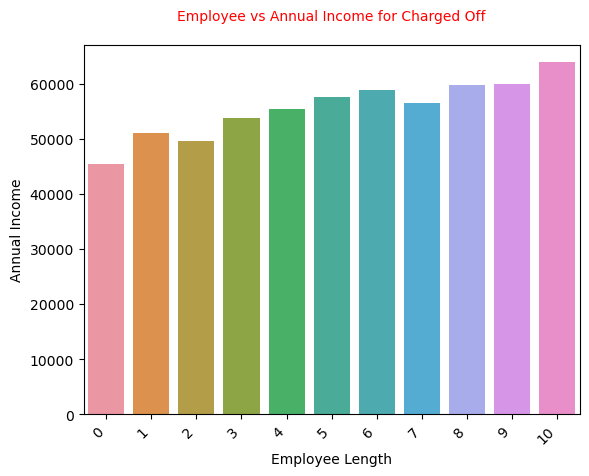

In [111]:
print("Univariate Graph 1")
# Employee Length vs Average Loan_amnt. Bar Chart
# 2 Graphs next to each other. One with Charged off, and next with Current+Fully Paid

tempdf = df1[['emp_length', 'annual_inc']].groupby(['emp_length'], as_index=False).mean()
tempdf.sort_values(by='emp_length', ascending=False, inplace=True)
sns.barplot(x='emp_length', y = 'annual_inc', data = tempdf)
plt.title('Employee vs Annual Income\n',fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Red'} )
plt.xlabel('Employee Length')
plt.ylabel('Annual Income')
plt.xticks(rotation=45, ha='right')
plt.show()

tempdf1 = df1[df1["loan_status"] == "Charged Off"]
tempdf2 = tempdf1[['emp_length', 'annual_inc']].groupby(['emp_length'], as_index=False).mean()
tempdf2.sort_values(by='emp_length', ascending=False, inplace=True)
sns.barplot(x='emp_length', y = 'annual_inc', data = tempdf2)
plt.title('Employee vs Annual Income for Charged Off\n',fontdict={'fontsize': 10, 'fontweight' : 5, 'color' : 'Red'} )
plt.xlabel('Employee Length')
plt.ylabel('Annual Income')
plt.xticks(rotation=45, ha='right')
plt.show()

# Observation - 
# 1. For all 3 loan status (Current, Charged off and Fully paisd), the average annual income is increasing with the Employee Length.
# 2. For Loan Status - Charged Off, the average annual income is lower compared to all other Loan status considered. 

In [ ]:
print("Univariate Graph 2")
# Average Loan_amnt. Box Plot
# 2 Graphs next to each other. One with Charged off, and next with Current+Fully Paid

In [ ]:
print("Univariate Graph 3")
# Purpose (Derived Purpose) vs Derived Purpose count. Bar Chart
# 2 Graphs next to each other. One with Charged off, and next with Current+Fully Paid

In [ ]:
print("Univariate Graph 4")
# Pie Chart of Purpose (Derived Purpose) 
# 2 Graphs next to each other. One with Charged off, and next with Current+Fully Paid

In [ ]:
print("Univariate Graph 5")
# Pie Chart of State 
# 2 Graphs next to each other. One with Charged off, and next with Current+Fully Paid

In [ ]:
print("Univariate Graph 6")
# Histo Graph of total_acc  
# 2 Graphs next to each other. One with Charged off, and next with Current+Fully Paid

UniVariate Graph 7


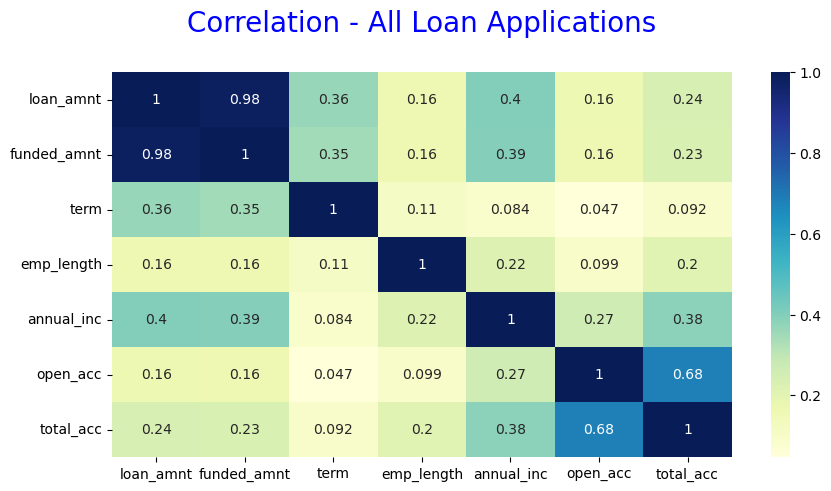

In [115]:
print("UniVariate Graph 7")
# Correlation graph on columns loan_amnt, funded_amnt, term, emp_length, annual_inc, open_acc, total_acc

corrdf = df1[['loan_amnt','funded_amnt','term','emp_length','annual_inc','open_acc', 'total_acc']].corr()
corrdf
plt.figure(figsize=[10,5])
sns.heatmap(corrdf, cmap="YlGnBu", annot = True)
plt.title('Correlation - All Loan Applications\n', fontdict={'fontsize': 20, 'fontweight' : 5, 'color' : 'Blue'})
plt.show()

# Observation - Unable to derive correlation across numerical data.  

# Step 3: BiVariate Analysis

In [101]:
print("BiVariate Graph 1")
# Bar graph or Box plot of Term (36, 60)  - Box plot of annual_inc for 36 Term, and box plot of Annal income for 60 Term


BiVariate Graph 1
